# 1DTFIM - Inference: 

In this notebook, we load the trained models to check the ground state energy produced by each trained model. The system size is N=20,40,80,100. Jz =1, Bx = 1 for all settings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../utility')
from hyprnn_wf import *
from hyprnn_train_loop_tfim import *

2025-04-03 14:05:59.108280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
tf.__version__, keras.__version__

('2.16.2', '3.5.0')

In [3]:
def define_load_test(wf, weight_link):
    test_samples_before = wf.sample(50,2)
    test_gs_before = Ising_local_energies(Jz, Bx, test_samples_before, wf)
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(50,2)
    test_gs_after = Ising_local_energies(Jz, Bx, test_samples_after, wf)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    wf.model.summary()
    print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')

# N=20

In [4]:
ssize = 20
units = 50
Jz = +np.ones(ssize)
Bx = 1.0
#Exact energy by DMRG
Ee_20 = -25.107797111623775

In [6]:
wf_n20ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='results/N20_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n20ernn, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -20.56824234446055, var E = 16.550407024381986


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_rnn_1 (EuclRNN)            │ ?                      │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -25.08017487982639, var E = 0.07432878876819282


In [7]:
wf_n20egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='results/N20_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n20egru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -21.369117248596435, var E = 12.284340972201294


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -25.07132211940078, var E = 0.06800319666645521


In [8]:
wf_n20hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='results/N20_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n20hgru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -22.017926531761574, var E = 12.025954796493325


Model: "wf_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -25.072497115965543, var E = 0.054653477811266796


# N=40

In [9]:
ssize = 40
units = 50
Jz = +np.ones(ssize)
Bx = 1.0

#Exact energy by DMRG
Ee_40 = -50.5694337844

In [10]:
wf_n40ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='results/N40_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n40ernn, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -42.13693567143721, var E = 30.949743808163262


Model: "wf_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_rnn_2 (EuclRNN)            │ ?                      │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -50.5518083365525, var E = 0.2482152805427006


In [11]:
wf_n40egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='results/N40_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n40egru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -42.51522291807657, var E = 28.856258945256055


Model: "wf_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_1 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -50.59215822824136, var E = 0.21984816106418031


In [12]:
wf_n40hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='results/N40_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n40hgru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -43.47724623239723, var E = 30.41270192235598


Model: "wf_model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -50.623387319328, var E = 0.15644801841641426


# N=80

In [13]:
ssize = 80
units = 50
Jz = +np.ones(ssize)
Bx = 1.0
#Exact energy by DMRG
Ee_80 = -101.49740945239212

In [14]:
wf_n80ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='results/N80_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n80ernn, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -80.66884156304245, var E = 93.89350182792292


Model: "wf_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_rnn_3 (EuclRNN)            │ ?                      │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -101.36255999299914, var E = 0.33154710241541246


In [15]:
wf_n80egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='results/N80_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n80egru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -83.04318813569795, var E = 98.94554819341315


Model: "wf_model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_2 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -101.43686316931382, var E = 0.1600874982727995


In [16]:
wf_n80hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='results/N80_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n80hgru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -84.83953423266568, var E = 89.19451807725817


Model: "wf_model_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_2 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -101.4553504137216, var E = 0.4809290290633056


# N=100

In [17]:
ssize = 100
units = 50
Jz = +np.ones(ssize)

Ee_100 =-126.96188

In [18]:
wf_n100egru = rnn_eucl_wf(ssize, 'EuclGRU', units)
weight_link ='results/N100_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n100egru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -103.79939948048151, var E = 105.2220653917272


Model: "wf_model_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_3 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -126.88522019189728, var E = 0.14186557631993113


In [19]:
wf_n100ernn = rnn_eucl_wf(ssize, 'EuclRNN', units)
weight_link ='results/N100_EuclRNN_50_ns50_checkpoint.weights.h5'
define_load_test(wf_n100ernn, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -99.47814202887335, var E = 105.54716882102613


Model: "wf_model_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_rnn_4 (EuclRNN)            │ ?                      │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -126.84546701804986, var E = 0.24938212200599


In [20]:
wf_n100hgru = rnn_hyp_wf(ssize, 'HypGRU', 'hyp', 'id', units)
weight_link ='results/N100_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_n100hgru, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = -95.38937973353104, var E = 109.90364025481077


Model: "wf_model_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_3 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -126.73687191962601, var E = 0.24525909705520196


# Convergence curves

In [21]:
#N20
mE_egru = np.load('results/N20_EuclGRU_50_ns50_meanE.npy')
mE_ernn = np.load('results/N20_EuclRNN_50_ns50_meanE.npy')
mE_hgru = np.load('results/N20_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn = np.load('results/N20_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru = np.load('results/N20_EuclGRU_50_ns50_varE.npy')
vE_ernn = np.load('results/N20_EuclRNN_50_ns50_varE.npy')
vE_hgru = np.load('results/N20_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn = np.load('results/N20_HypRNN_50_hyp_id_ns50_varE.npy')


#N40
mE_egru40 = np.load('results/N40_EuclGRU_50_ns50_meanE.npy')
mE_ernn40 = np.load('results/N40_EuclRNN_50_ns50_meanE.npy')
mE_hgru40 = np.load('results/N40_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn40 = np.load('results/N40_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru40 = np.load('results/N40_EuclGRU_50_ns50_varE.npy')
vE_ernn40 = np.load('results/N40_EuclRNN_50_ns50_varE.npy')
vE_hgru40 = np.load('results/N40_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn40 = np.load('results/N40_HypRNN_50_hyp_id_ns50_varE.npy')

#N80
mE_egru80 = np.load('results/N80_EuclGRU_50_ns50_meanE.npy')
mE_ernn80 = np.load('results/N80_EuclRNN_50_ns50_meanE.npy')
mE_hgru80 = np.load('results/N80_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn80 = np.load('results/N80_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru80 = np.load('results/N80_EuclGRU_50_ns50_varE.npy')
vE_ernn80 = np.load('results/N80_EuclRNN_50_ns50_varE.npy')
vE_hgru80 = np.load('results/N80_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn80 = np.load('results/N80_HypRNN_50_hyp_id_ns50_varE.npy')

#N100
mE_egru100 = np.load('results/N100_EuclGRU_50_ns50_meanE.npy')
mE_ernn100 = np.load('results/N100_EuclRNN_50_ns50_meanE.npy')
mE_hgru100 = np.load('results/N100_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_hrnn100 = np.load('results/N100_HypRNN_50_hyp_id_ns50_meanE.npy')

vE_egru100 = np.load('results/N100_EuclGRU_50_ns50_varE.npy')
vE_ernn100 = np.load('results/N100_EuclRNN_50_ns50_varE.npy')
vE_hgru100 = np.load('results/N100_HypGRU_50_hyp_id_ns50_varE.npy')
vE_hrnn100 = np.load('results/N100_HypRNN_50_hyp_id_ns50_varE.npy')

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, e_names, N, frange, legend_loc):
    x = np.arange(len(e_list[0]))
    ax.plot(x, e_list[0],color = 'blue', label = e_names[0])
    ax.plot(x, e_list[1], color = 'cyan',label = e_names[1])
    ax.plot(x, e_list[2], color = 'green', label = e_names[2])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(x, e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(x, e_list[2], color = 'green', label = e_names[2])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"N={N}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(x, v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(x, v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(x, v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

/var/folders/_m/f5wfg_q565n3zzgb4_nnnz4m0000gn/T/ipykernel_43790/2414854538.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50.png')
/Users/hldao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


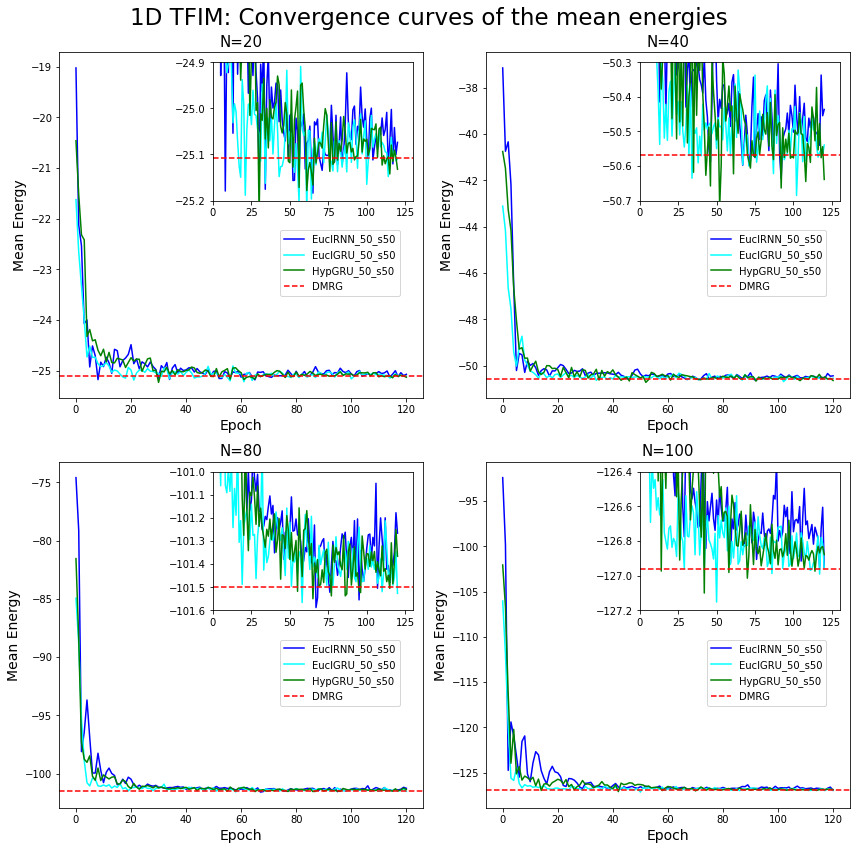

In [23]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list20 = [mE_ernn, mE_egru,  mE_hgru]
e_list40 = [mE_ernn40, mE_egru40,  mE_hgru40]
e_list80 = [mE_ernn80, mE_egru80,  mE_hgru80]
e_list100 = [mE_ernn100, mE_egru100,  mE_hgru100]
e_names = ['EuclRNN_50_s50', 'EuclGRU_50_s50', 'HypGRU_50_s50']
plot_res_meanE(ax[0,0], Ee_20, e_list20, e_names, 20, [0,130, -25.2, -24.9], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[0,1], Ee_40, e_list40, e_names, 40, [0,130, -50.7, -50.3], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], Ee_80, e_list80, e_names, 80, [0,130, -101.6, -101.], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], Ee_100, e_list100, e_names, 100, [0,130, -127.2, -126.4], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Convergence curves of the mean energies', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50.png')

/var/folders/_m/f5wfg_q565n3zzgb4_nnnz4m0000gn/T/ipykernel_43790/1490695176.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')


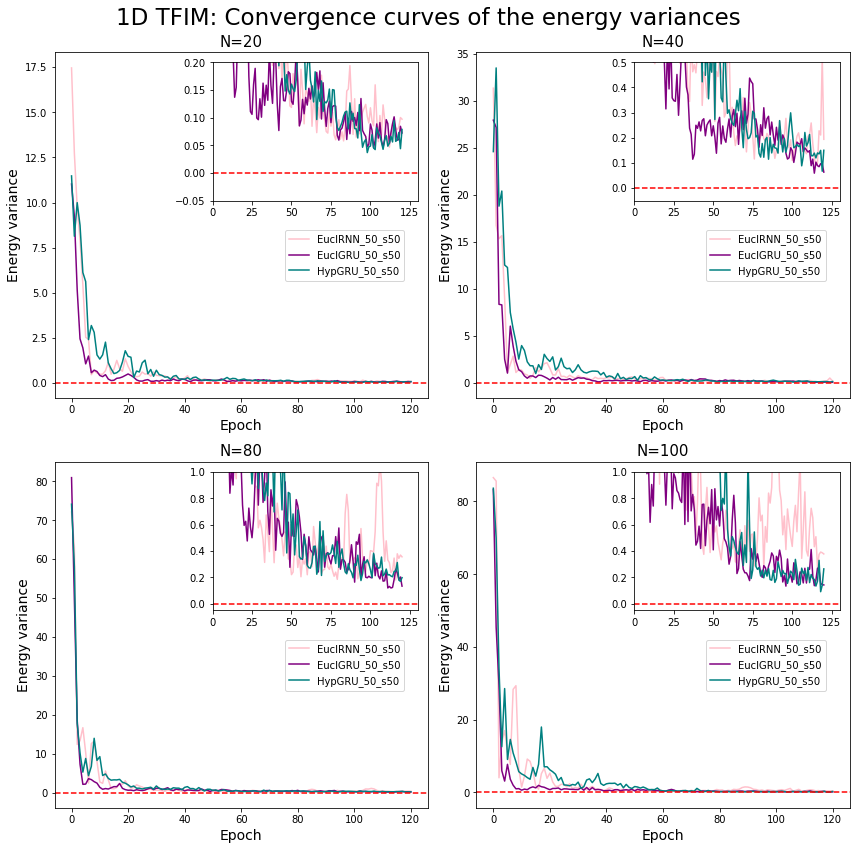

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
v_list20 = [vE_ernn, vE_egru,  vE_hgru]
v_list40 = [vE_ernn40, vE_egru40,  vE_hgru40]
v_list80 = [vE_ernn80, vE_egru80,  vE_hgru80]
v_list100 = [vE_ernn100, vE_egru100,  vE_hgru100]
e_names = ['EuclRNN_50_s50', 'EuclGRU_50_s50', 'HypGRU_50_s50']
plot_res_var(ax[0,0], v_list20, e_names, 20, [0,130, -0.05, 0.2],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], v_list40, e_names, 40,[0,130, -0.05, 0.5],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], v_list80, e_names, 80, [0,130, -0.05, 1.0],(0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], v_list100, e_names, 100, [0,130, -0.05, 1.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D TFIM: Convergence curves of the energy variances', fontsize = 23)
plt.savefig('1dTFIM_all_N_ns50_nu50_var.png')